## 初步处理数据

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

In [46]:
data = np.loadtxt('F:\data.txt')
df = pd.DataFrame(data)

In [54]:
df = df.iloc[1:] # 删除第一行 第一个数据可能不准确

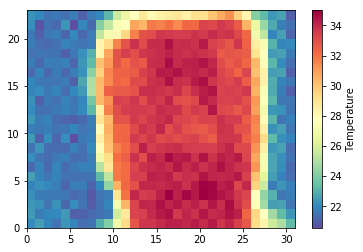

In [45]:
# 按热力图画出温度分布
X, Y = np.meshgrid(np.linspace(0, 31, 32), np.linspace(0, 23, 24))
temperature = df.iloc[20]
temperature0 = np.zeros([24, 32]) 
k = 0
for i in range(24):
    for j in range(32):
        temperature0[-1-i, -1-j] = temperature[k] #之所以要-1-j是因为temperature0矩阵的第一行对应的其实是图的最下面一行
        k += 1

fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1)
c = ax.pcolormesh(X, Y, temperature0, cmap='Spectral_r')
cb = fig.colorbar(c)
cb.set_label('Temperature')
plt.show()

## 尝试让温度分区更加细一点，能不能划分出面部结构

In [213]:
# 让脸部温度单独保存，环境温度设计为统一值
ta = df.min(axis=1)

df_face = pd.DataFrame()
df_onlyface = pd.DataFrame()
for i, minTa in zip(df.values, ta):
    face = []
    onlyface = []
    for j in i:
        if j - minTa > 7:
            face.append(j)
            onlyface.append(j)
        else:
            face.append(minTa)
    face_todf = pd.DataFrame(face).T
    onlyface_todf = pd.DataFrame(onlyface).T
    df_face = pd.concat([df_face, face_todf], axis = 0)
    df_onlyface = pd.concat([df_onlyface, onlyface_todf], axis = 0)

In [214]:
df_onlyface.index = range(df_onlyface.shape[0])

结果表现一般，用90640区分脸部不同区域存在较大困难，先探究温度点频数和热舒适度的联系

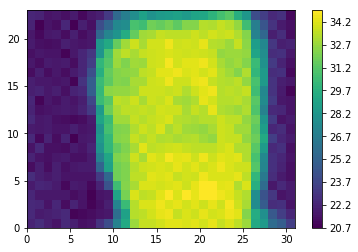

In [97]:
# 设计更细致的温度分级（成不同颜色）
cmap = plt.get_cmap(name='Spectral_r')
levels = MaxNLocator(nbins=100).tick_values(temperature_i.min(), temperature_i.max())  # 分成binb
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# 把温度处理成矩阵
temperature_i = df_face.iloc[20]
temperature0 = np.zeros([24, 32]) 
k = 0
for i in range(24):
    for j in range(32):
        temperature0[-1-i, -1-j] = temperature[k] #之所以要-1-j是因为temperature0矩阵的第一行对应的其实是图的最下面一行
        k += 1

fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1)
im = ax0.pcolormesh(X, Y, temperature0, norm=norm)
fig.colorbar(im, ax=ax0)
plt.show()

## 对温度分布频数进行统计

In [211]:
# 排除掉脸部温度点小于400和大于500的样本
df_onlyface = df_onlyface[df_onlyface.count(axis=1)>400]
df_onlyface = df_onlyface[df_onlyface.count(axis=1)<500]

In [156]:
# 分成24个区间
N, bins = np.histogram(df_onlyface.iloc[10].dropna(), 25)

In [159]:
# 这个分割点会一直用它！
print('区间频数:', N)
print('分割点：', bins)

区间频数: [ 5.  3.  5.  1.  3.  4.  5.  3.  5.  2.  5.  6.  9.  3. 13. 15. 24. 25.
 39. 46. 52. 70. 67. 19.  6.]
分割点： [28.21597   28.4978672 28.7797644 29.0616616 29.3435588 29.625456
 29.9073532 30.1892504 30.4711476 30.7530448 31.034942  31.3168392
 31.5987364 31.8806336 32.1625308 32.444428  32.7263252 33.0082224
 33.2901196 33.5720168 33.853914  34.1358112 34.4177084 34.6996056
 34.9815028 35.2634   ]


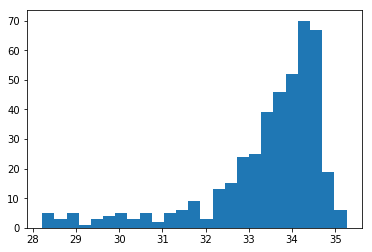

In [158]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1)
N, bins, patches = ax0.hist(np.array(df_onlyface.iloc[10].dropna()), bins=bins) # 使用相同的分割点
plt.show()

In [169]:
temDistribution = pd.DataFrame()
for i in df_onlyface.values:
    i = [j for j in i if not np.isnan(j)]
    N, _ = np.histogram(i, bins=bins)
    N_todf = pd.DataFrame(N).T
    temDistribution = pd.concat([temDistribution, N_todf])

In [206]:
temDistribution.index = [i for i in range(temDistribution.shape[0])]
temDistribution.columns = ["p{}".format(i) for i in range(temDistribution.shape[1])]
temDistribution

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24
0,2,11,6,3,5,4,8,7,10,3,...,12,16,19,28,44,58,61,59,51,21
1,13,3,3,6,5,4,3,4,2,4,...,15,30,21,28,57,66,58,62,44,16
2,6,5,4,4,6,5,5,6,3,4,...,18,18,20,34,60,63,63,51,36,12
3,4,7,4,4,8,6,3,7,8,3,...,6,15,21,26,53,54,46,51,42,14
4,7,7,5,8,7,3,3,10,8,9,...,12,17,28,37,43,58,55,35,28,7
5,4,7,4,3,0,6,5,7,9,4,...,14,24,21,33,57,50,50,58,31,9
6,9,0,2,1,1,3,5,5,8,6,...,12,20,26,34,40,57,72,58,28,10
7,4,2,4,4,4,0,1,5,4,5,...,22,18,23,34,46,50,77,50,28,6
8,4,4,3,3,2,2,4,4,3,11,...,14,21,12,33,36,47,69,59,46,15
9,6,3,4,3,4,3,4,8,5,5,...,15,22,26,29,45,60,67,59,29,8


## 处理数据的脚本 （从头到尾）

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
import time

data = np.loadtxt('F:\data.txt')
df = pd.DataFrame(data)

df = df.iloc[4:] # 删除前三行 第一个数据可能不准确

In [44]:
# 让脸部温度单独保存，环境温度设计为统一值
ta = df.min(axis=1)

df_face = pd.DataFrame()
df_onlyface = pd.DataFrame()
for i, minTa in zip(df.values, ta):
    face = []
    onlyface = []
    for j in i:
        if j - minTa > 7:
            face.append(j)
            onlyface.append(j)
        else:
            face.append(minTa)
    face_todf = pd.DataFrame(face).T
    onlyface_todf = pd.DataFrame(onlyface).T
    df_face = pd.concat([df_face, face_todf], axis = 0)
    df_onlyface = pd.concat([df_onlyface, onlyface_todf], axis = 0)

In [45]:
df_onlyface.index = range(df_onlyface.shape[0])
ta.index = range(ta.shape[0])

In [46]:
if df_onlyface.shape[0] == ta.shape[0]:
    df_face_ta = pd.concat([df_onlyface, ta], axis=1, ignore_index=True)

In [47]:
df_face_ta = df_face_ta[df_face_ta.count(axis=1)>400]
df_face_ta = df_face_ta[df_face_ta.count(axis=1)<500]

In [48]:
# 先把ta拿掉坐频数统计，再把ta连接回去

df_face_ = df_face_ta.iloc[:, :-1]

bins = [28.21597, 28.4978672, 28.7797644, 29.0616616, 29.3435588, 29.625456,
 29.9073532, 30.1892504, 30.4711476, 30.7530448, 31.034942,  31.3168392,
 31.5987364, 31.8806336, 32.1625308, 32.444428,  32.7263252, 33.0082224,
 33.2901196, 33.5720168, 33.853914,  34.1358112, 34.4177084, 34.6996056,
 34.9815028, 35.2634]

temDistribution = pd.DataFrame()
for i in df_face_.values:
    i = [j for j in i if not np.isnan(j)]
    N, _ = np.histogram(i, bins=bins)
    N_todf = pd.DataFrame(N).T
    temDistribution = pd.concat([temDistribution, N_todf])
    
    # 总是因为index不同，无法强行连接，重设一下index
    ta = df_face_ta.iloc[:,-1]
    ta.index = range(ta.shape[0])
    temDistribution.index = range(temDistribution.shape[0])
    
if temDistribution.shape[0] == df_face_ta.iloc[:,-1].shape[0]:
    temDistribution = pd.concat([temDistribution, ta], axis=1)

In [49]:
temDistribution.index = [i for i in range(temDistribution.shape[0])]
temDistribution.columns = ["p{}".format(i) for i in range(temDistribution.shape[1]-1)] + ["ta"]
temDistribution

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p16,p17,p18,p19,p20,p21,p22,p23,p24,ta
0,4,6,11,13,6,16,13,12,13,22,...,44,46,35,17,5,3,2,0,0,20.17139
1,3,7,5,13,13,17,9,13,11,23,...,55,45,35,14,4,1,0,0,0,20.59512
2,4,4,7,9,14,18,7,15,16,12,...,60,53,32,27,7,3,0,0,0,20.83707
3,3,7,11,11,19,11,7,15,11,22,...,47,45,27,11,8,1,0,0,0,20.46317
4,5,5,6,8,6,11,10,12,14,18,...,45,42,40,28,9,0,0,0,0,20.71530
5,6,3,5,7,8,10,10,15,8,17,...,43,48,31,21,6,1,1,0,0,20.44571
6,5,5,8,11,10,11,9,15,9,9,...,42,57,24,8,1,2,0,0,0,20.46280


In [50]:
inp = input('请输入热舒适度：0过冷 1冷 2舒适 3热 4过热')
label = int(inp)
label = pd.DataFrame(np.array([label]*temDistribution.shape[0]))
temDistribution_label = pd.concat([temDistribution, label], axis=1)

请输入热舒适度：0过冷 1冷 2舒适 3热 4过热1


保存原始数据和处理后的特征数据

In [12]:
import time
df.to_csv("raw_data/data_{}_{}.csv".format(time.strftime("%Y%m%d_%H%M", time.localtime()), inp), mode='a', index=False, header=True)

In [13]:
# pd.read_csv("raw_data/data_1.csv")
# pd.read_csv("raw_data/data_20190303_1035_1.csv")

,21.62225,22.06564,21.37326,21.57752,22.15369,21.70099,22.34293,22.29416,23.56241,24.90378,...,32.57739,33.02512,30.85397,31.30756,25.33356,24.10407,21.30432,21.78345,21.2522,22.56427
0,21.21527,22.07440,20.61154,21.96155,21.34949,22.17569,21.66470,22.74518,23.87622,25.21826,...,32.67810,32.24600,32.05853,31.20090,25.33881,23.37814,21.31058,21.90933,21.84418,21.06586
1,20.93674,21.80835,21.62329,21.72003,21.70374,22.42368,22.23990,22.76587,24.10062,25.85428,...,32.51956,32.85422,31.99039,30.69806,25.59381,23.75159,21.71298,21.77765,21.55289,22.84256
2,21.09463,21.67825,20.87979,21.46539,20.90115,22.18057,21.79141,22.63977,23.36700,25.12222,...,33.07068,32.45517,31.46860,29.53760,24.41540,22.54822,21.31555,21.52646,21.40900,21.68292
3,21.76132,22.21555,21.51114,21.72684,21.94748,22.19882,22.47983,22.21991,23.38474,24.43414,...,32.52457,32.18570,28.14548,24.23904,22.07718,22.55585,20.94202,21.78906,21.55658,21.81592
4,21.76016,22.48441,21.38385,21.97962,21.60193,21.85303,21.34650,21.77844,22.75366,23.61356,...,31.75440,31.59689,26.69357,23.45572,21.23831,22.06717,21.71848,22.45209,21.70242,21.66486
5,20.82376,21.81632,21.64627,22.10288,21.49692,22.20081,21.35660,21.77704,21.91730,23.09351,...,31.65494,31.21231,24.89645,22.33859,21.59604,21.83328,21.71561,22.06418,21.11066,22.71402
6,21.77457,21.96228,21.01840,21.86527,21.73084,21.98016,22.15408,21.34250,22.55606,22.58377,...,32.15097,30.52353,23.83841,22.23056,21.84909,22.32730,22.11481,21.80411,21.71301,21.98050
7,21.36243,21.96744,20.88419,21.24344,21.60904,21.63507,21.46753,21.90509,22.23276,22.69253,...,31.57309,30.61707,23.08835,23.12512,21.85620,21.95114,21.09015,21.65973,21.28070,21.67032
8,20.68903,22.88864,21.52206,22.11075,21.03720,21.74304,21.35898,21.67352,21.70731,22.47550,...,31.76019,30.91922,23.51059,22.56470,22.32123,22.44208,21.98081,21.39493,22.43704,21.52289
9,21.36826,21.69693,21.14374,22.24194,21.95972,21.39889,21.70096,21.79157,22.23911,21.95755,...,31.47601,30.32553,22.32291,22.22610,21.84976,22.20001,20.95367,21.79758,21.85901,21.82321


In [74]:
# temDistribution_label.to_csv("test.csv", index=False,header=True)
temDistribution_label.to_csv("test_{}_{}.csv".format(time.strftime("%Y%m%d_%H%M", time.localtime()), inp), mode='a', index=False, header =True)

处理后的特征数据如下所示

In [75]:
pd.read_csv("test_1.csv")

,4,6,11,13,6.1,16,13.1,12,13.2,22,...,46,35,17,5,3,2,0,0.1,20.17139,1
0,3,7,5,13,13,17,9,13,11,23,...,45,35,14,4,1,0,0,0,20.59512,1
1,4,4,7,9,14,18,7,15,16,12,...,53,32,27,7,3,0,0,0,20.83707,1
2,3,7,11,11,19,11,7,15,11,22,...,45,27,11,8,1,0,0,0,20.46317,1
3,5,5,6,8,6,11,10,12,14,18,...,42,40,28,9,0,0,0,0,20.71530,1
4,6,3,5,7,8,10,10,15,8,17,...,48,31,21,6,1,1,0,0,20.44571,1
5,5,5,8,11,10,11,9,15,9,9,...,57,24,8,1,2,0,0,0,20.46280,1


## 尝试了脱掉衣服 感觉冷的时候测试

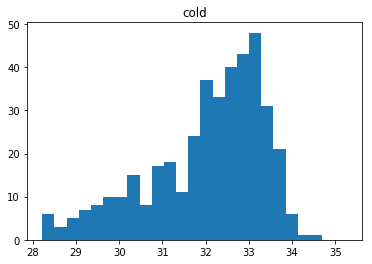

In [55]:
fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1)
N, bins, patches = ax0.hist(np.array(df_face_ta.iloc[5, :-1].dropna()), bins=bins) # 使用相同的分割点
plt.title('cold')
plt.show()

对比下图 感觉舒适时 明显分布左偏

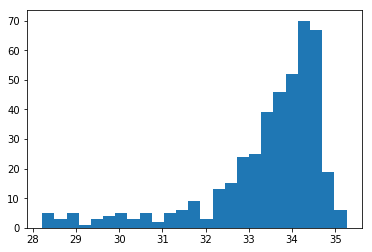